<a href="https://colab.research.google.com/github/CurdtMillion/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [156]:
df = df.drop(['diagnosis', 'Unnamed: 32', 'id'], axis=1)
df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset
from sklearn.cluster import KMeans

In [0]:
features = ['radius_mean', 'perimeter_mean', 'area_mean']

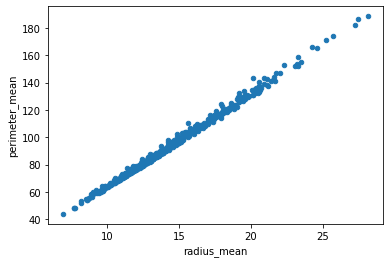

In [159]:
# Plotting to see how it looks
df[features].plot(kind='scatter', x=features[0], y=features[1]);

In [0]:
k =3
model = KMeans(n_clusters=k, max_iter=1)

In [161]:
model.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df['cluster'] = model.labels_

In [0]:
# Getting the centroids
centroids = model.cluster_centers_

In [164]:
# ...and turning them into a DataFrame
clust_cent = pd.DataFrame(centroids)
clust_cent.head()

,0,1,2
0,15.248167,99.667722,724.875556
1,11.565163,74.346300,416.117667
2,20.496742,135.801124,1318.191011


In [0]:
# Setting up colors for plotting purposes
plot_colors = ['r', 'g', 'b']
colors = [plot_colors[centroid] for centroid in model.labels_]

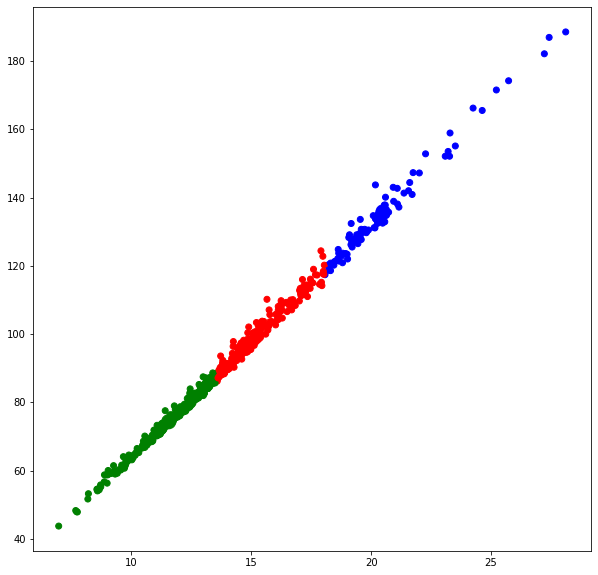

In [166]:
# Now plot the scatter of the points w/ calculated centroids
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(clust_cent[0], clust_cent[1], c=plot_colors, s=200);

In [0]:
# The above is the cluster I was able to view

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# This part will need to be finished...
# Grabbing the true diagnosis column
# I cannot remember how to add back a column, so I am just calling the original
# and naming it df_label
df_label = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
df2 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

In [0]:
df2 = df2.drop(['diagnosis', 'Unnamed: 32', 'id'], axis=1)

In [169]:
features=list(df2.columns)
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaled_data = scaler.fit_transform(df2)

In [172]:
scaled_data[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [173]:
# Turn it back into a DF
df2_scaled = pd.DataFrame(scaled_data,columns=features)
df2_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [174]:
# This value was 1
df2_scaled[features].std()

radius_mean                1.00088
texture_mean               1.00088
perimeter_mean             1.00088
area_mean                  1.00088
smoothness_mean            1.00088
compactness_mean           1.00088
concavity_mean             1.00088
concave points_mean        1.00088
symmetry_mean              1.00088
fractal_dimension_mean     1.00088
radius_se                  1.00088
texture_se                 1.00088
perimeter_se               1.00088
area_se                    1.00088
smoothness_se              1.00088
compactness_se             1.00088
concavity_se               1.00088
concave points_se          1.00088
symmetry_se                1.00088
fractal_dimension_se       1.00088
radius_worst               1.00088
texture_worst              1.00088
perimeter_worst            1.00088
area_worst                 1.00088
smoothness_worst           1.00088
compactness_worst          1.00088
concavity_worst            1.00088
concave points_worst       1.00088
symmetry_worst      

In [175]:
# This value was 0
df2_scaled.mean()

radius_mean               -1.256562e-16
texture_mean               1.049736e-16
perimeter_mean            -1.272171e-16
area_mean                 -1.900452e-16
smoothness_mean            1.490704e-16
compactness_mean           2.544342e-16
concavity_mean            -1.338511e-16
concave points_mean       -8.429110e-17
symmetry_mean              2.081912e-16
fractal_dimension_mean     5.408679e-16
radius_se                  2.475807e-16
texture_se                -9.912009e-17
perimeter_se              -2.968237e-16
area_se                   -1.088760e-16
smoothness_se              4.426014e-16
compactness_se             1.958988e-16
concavity_se               1.678017e-16
concave points_se          2.185325e-17
symmetry_se                1.523874e-16
fractal_dimension_se      -5.658430e-17
radius_worst              -7.988142e-16
texture_worst             -1.834112e-17
perimeter_worst           -4.015534e-16
area_worst                -2.848727e-17
smoothness_worst          -2.189227e-16


In [0]:
# Now that its scaled, apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=8)

In [0]:
pca_features = pca.fit_transform(df2_scaled)

In [178]:
# How much variation did each PC explain?
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724])

In [179]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.9259825386747605

In [180]:
# How much info was lost?
1-sum(pca.explained_variance_ratio_)

0.07401746132523945

In [181]:
# Turn all that into a DF
df2_pca = pd.DataFrame(pca_features, columns=['comp_1', 'comp_2', 'comp_3',
                                              'comp_4', 'comp_5', 'comp_6',
                                              'comp_7', 'comp_8'])
df2_pca.head()

,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8
0,9.192837,1.948583,-1.123166,3.633731,-1.195111,1.411424,2.159371,-0.398483
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657,0.013357,0.241027
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541452,-0.668162,0.097412
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429920,1.059626
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636358


In [0]:
# Now, to apply clustering
k = 8
model = KMeans(n_clusters=k, max_iter=1)

In [183]:
model.fit(df2_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df2_pca['cluster'] = model.labels_

In [0]:
centroids2 = model.cluster_centers_

In [186]:
clust_cent2 = pd.DataFrame(centroids2)
clust_cent2.head()

,0,1,2,3,4,5,6,7
0,2.349380,-3.092038,0.197511,0.613566,0.203256,0.221361,-0.412008,0.252645
1,1.716978,5.103684,2.915660,0.361158,3.571654,0.004815,-0.185228,0.468471
2,-1.419918,1.486934,-0.051526,0.444629,-0.389311,-0.239364,-0.043167,-0.054413
3,10.756486,1.123525,2.975433,0.663976,-1.051257,1.358422,1.167936,0.024920
4,-3.065847,-1.259043,-0.275746,1.334972,0.492769,-0.083738,0.113577,-0.010533


In [0]:
# Colors for plotting
plot_colors2 = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'gray']
colors2 = [plot_colors2[centroid] for centroid in model.labels_]

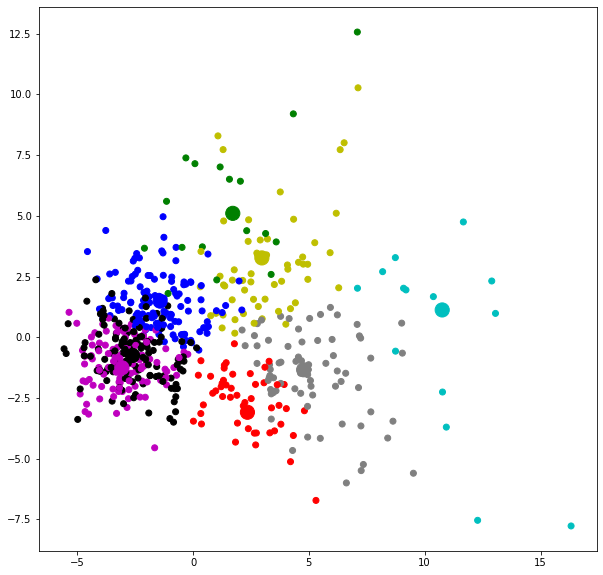

In [188]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df2_pca['comp_1'], df2_pca['comp_2'], c=colors2)
ax.scatter(clust_cent2[0], clust_cent2[1], c=plot_colors2, s=200);

In [189]:
# Checking the silhouette score
metrics.silhouette_score(df2, model.labels_, metric='euclidean')

-0.10175671580849745

In [190]:
# Predicted centroid for each data point
model.labels_

array([3, 0, 7, 5, 0, 5, 0, 5, 5, 5, 6, 7, 3, 0, 5, 5, 0, 5, 7, 2, 2, 2,
       5, 0, 7, 3, 5, 0, 5, 0, 7, 5, 7, 7, 5, 7, 5, 6, 6, 5, 6, 2, 3, 5,
       2, 7, 6, 5, 4, 6, 6, 4, 4, 7, 6, 6, 7, 5, 6, 2, 2, 2, 5, 2, 5, 5,
       2, 6, 1, 4, 0, 1, 7, 2, 4, 0, 2, 7, 3, 6, 2, 5, 3, 7, 2, 7, 2, 7,
       2, 2, 6, 2, 4, 6, 7, 7, 6, 6, 4, 2, 6, 2, 6, 2, 2, 5, 2, 6, 3, 2,
       2, 2, 1, 2, 2, 2, 1, 5, 5, 0, 4, 7, 3, 2, 4, 4, 6, 0, 2, 7, 2, 0,
       0, 4, 0, 6, 6, 4, 7, 2, 4, 0, 2, 4, 4, 2, 5, 2, 2, 4, 2, 1, 1, 4,
       2, 6, 7, 6, 4, 4, 2, 0, 7, 2, 7, 6, 4, 0, 7, 4, 4, 6, 5, 2, 6, 4,
       1, 7, 6, 4, 7, 7, 0, 4, 6, 2, 0, 4, 6, 4, 5, 6, 6, 5, 5, 4, 5, 0,
       7, 5, 2, 0, 7, 5, 2, 4, 2, 0, 5, 4, 0, 6, 3, 1, 5, 5, 2, 6, 7, 7,
       4, 2, 2, 5, 4, 4, 4, 4, 6, 5, 7, 6, 6, 0, 2, 6, 7, 0, 6, 7, 4, 4,
       5, 6, 7, 2, 6, 1, 6, 2, 7, 6, 7, 0, 0, 2, 7, 5, 3, 5, 7, 6, 0, 6,
       0, 7, 2, 6, 6, 2, 4, 4, 7, 2, 0, 2, 4, 0, 6, 4, 7, 6, 7, 5, 6, 6,
       2, 4, 1, 6, 1, 6, 2, 6, 4, 4, 4, 6, 4, 6, 7,

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project